In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
%matplotlib inline
sns.set_style("darkgrid")

In [174]:
features_3s = pd.read_csv("Data/features_3_sec.csv")
features_3s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [175]:
features_3s['label'].value_counts()

metal        1000
blues        1000
pop          1000
jazz         1000
reggae       1000
disco         999
classical     998
rock          998
hiphop        998
country       997
Name: label, dtype: int64

In [176]:
features_3s.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

<AxesSubplot:xlabel='spectral_centroid_var', ylabel='Count'>

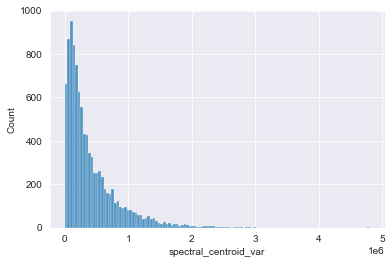

In [177]:
sns.histplot(features_3s['spectral_centroid_var'])

In [178]:
#therefore most of the songs have a center of mass between 0 and 1 (before the fourier transform)

<AxesSubplot:xlabel='spectral_centroid_mean', ylabel='Count'>

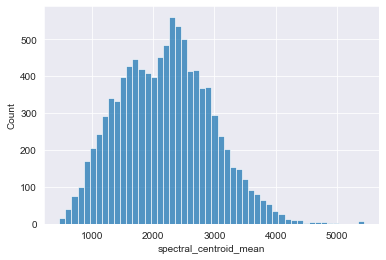

In [179]:
sns.histplot(features_3s['spectral_centroid_mean'])

In [180]:
#center of mass of most audio files like between 2000 and 3000

<AxesSubplot:xlabel='spectral_bandwidth_mean', ylabel='Count'>

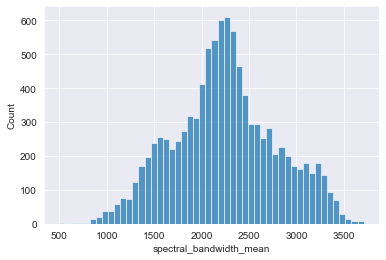

In [181]:
sns.histplot(features_3s['spectral_bandwidth_mean'])

In [182]:
#frequency bandwidth of most audio files are 2250 hz

<AxesSubplot:xlabel='rolloff_mean', ylabel='Count'>

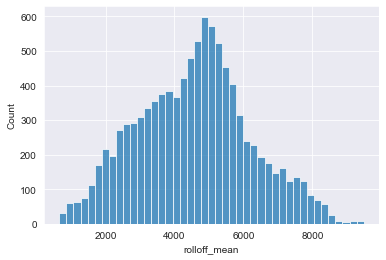

In [183]:
sns.histplot(features_3s['rolloff_mean'])

In [184]:
#therefore the highest frequencies after which values decline to 0 is between 5000-6000

In [186]:
#STANDARDIZING
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(features_3s.drop(['filename','label'],axis=1))
scaled_features=scaler.transform(features_3s.drop(['filename','label'],axis=1))
scaled_features
features_3s_new=pd.DataFrame(scaled_features,columns=features_3s.columns[1:-1])
features_3s_new=pd.concat([features_3s_new,features_3s['label']],axis=1)
features_3s_new.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781,blues
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548,blues
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062,blues
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873,blues
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713,blues


In [213]:
#PERFORMING ONE-HOT-ENCODING
ohe={'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
features_3s_new['label'] = [ohe[l] for l in features_3s_new['label']]
features_3s_new

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781,0
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548,0
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062,0
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873,0
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.376757,0.617031,0.111106,0.002984,0.206932,0.034101,0.380041,0.068680,0.266983,0.065229,...,0.060299,0.302553,0.069546,0.285713,0.044089,0.371046,0.040116,0.536263,0.042502,9
9986,0.413243,0.637013,0.128944,0.002687,0.277274,0.058465,0.438552,0.079860,0.349793,0.090105,...,0.045545,0.249505,0.122777,0.305915,0.081395,0.263338,0.052963,0.516365,0.020232,9
9987,0.374196,0.697548,0.116503,0.021500,0.176099,0.138139,0.331163,0.111494,0.202062,0.200409,...,0.112660,0.408760,0.038190,0.442668,0.035995,0.496892,0.039921,0.505937,0.045380,9
9988,0.436537,0.657745,0.148266,0.009825,0.324968,0.042367,0.473422,0.017567,0.413964,0.038187,...,0.039551,0.362864,0.029532,0.471308,0.028749,0.506738,0.019101,0.519900,0.013740,9


In [215]:
features_3s_new['label'].value_counts()

0    1000
8    1000
5    1000
6    1000
7    1000
3     999
1     998
9     998
4     998
2     997
Name: label, dtype: int64

In [216]:
#SPLITTING INTO TEST AND TRAIN SET
x=features_3s_new.drop('label', axis=1) #feature array
y=features_3s_new['label'] #target array 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
y_train = y_train.values #converting series to dataframe
y_test = y_test.values 

In [217]:
x

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.376757,0.617031,0.111106,0.002984,0.206932,0.034101,0.380041,0.068680,0.266983,0.065229,...,0.494342,0.060299,0.302553,0.069546,0.285713,0.044089,0.371046,0.040116,0.536263,0.042502
9986,0.413243,0.637013,0.128944,0.002687,0.277274,0.058465,0.438552,0.079860,0.349793,0.090105,...,0.438282,0.045545,0.249505,0.122777,0.305915,0.081395,0.263338,0.052963,0.516365,0.020232
9987,0.374196,0.697548,0.116503,0.021500,0.176099,0.138139,0.331163,0.111494,0.202062,0.200409,...,0.391617,0.112660,0.408760,0.038190,0.442668,0.035995,0.496892,0.039921,0.505937,0.045380
9988,0.436537,0.657745,0.148266,0.009825,0.324968,0.042367,0.473422,0.017567,0.413964,0.038187,...,0.469334,0.039551,0.362864,0.029532,0.471308,0.028749,0.506738,0.019101,0.519900,0.013740


In [218]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9985    9
9986    9
9987    9
9988    9
9989    9
Name: label, Length: 9990, dtype: int64

In [219]:
y_train.shape

(6993,)

In [220]:
y_test.shape

(2997,)

In [303]:
#CREATING THE MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
model1=Sequential()
model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #do one hot encoding on dataset

In [304]:
#TRAINING THE MODEL
history = model1.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=128)

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

55/55 [==============================] - 1s 10ms/step - loss: 2.0548 - accuracy: 0.2312 - val_loss: 1.6858 - val_accuracy: 0.3754
Epoch 2/500
55/55 [==============================] - 0s 8ms/step - loss: 1.7226 - accuracy: 0.3588 - val_loss: 1.5080 - val_accuracy: 0.4575
Epoch 3/500
55/55 [==============================] - 1s 13ms/step - loss: 1.5379 - accuracy: 0.4241 - val_loss: 1.2942 - val_accuracy: 0.5205
Epoch 4/500
55/55 [==============================] - 1s 13ms/step - loss: 1.4351 - 

In [305]:
print(model1.summary())

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 57)                0         
_________________________________________________________________
dense_290 (Dense)            (None, 512)               29696     
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_291 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_292 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)             

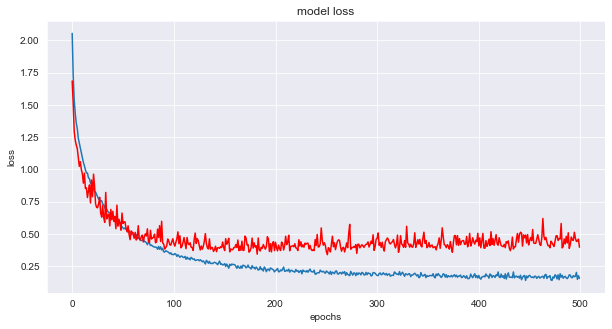

In [306]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color = 'r')
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

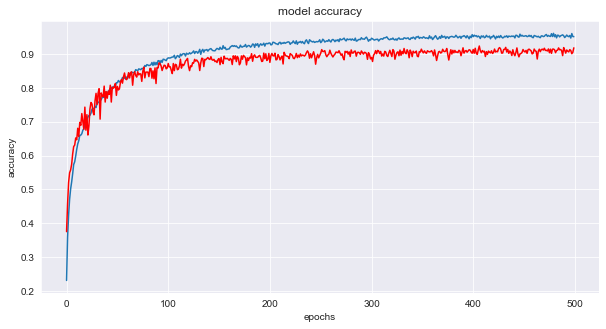

In [307]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color = 'r')
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [308]:
test_loss, test_acc  = model1.evaluate(x_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

24/24 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.9183
The test Loss is : 0.3978267014026642

The Best test Accuracy is : 91.82515740394592
